# Question 3: How is the rent price per day vary for each properties?

# Dataset: Seattle Airbnb Open Data 
link: https://www.kaggle.com/datasets/airbnb/seattle/data 

Context:
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.


Content:
The following Airbnb activity is included in this Seattle dataset:

"calendar.csv" - Calendar, including listing id and the price and availability for that day     
"listings.csv" -   Listings, including full descriptions and average review score      
"reviews.csv" - Reviews, including unique id for each reviewer and detailed comments     


License:    
CC0: Public Domain

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline



# Inferences from the file : "calendar.csv"

In [2]:
cal_df = pd.read_csv('calendar.csv')
cal_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [3]:
# Remove rows with missing 'price' values from the 'cal_df' 
# and create a new DataFrame 'cal_mod_df' without those rows.
# Then, create a copy of 'cal_mod_df' called 'cal_mod_df_copy'.
cal_mod_df = cal_df.dropna(subset=['price'],axis=0)
cal_mod_df_copy = cal_mod_df.copy()
cal_mod_df_copy.loc[:, 'price'] = cal_mod_df_copy['price'].str.replace('$', '').str.replace(',', '').astype(float)
cal_mod_df_copy

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0
1393208,10208623,2016-01-07,t,87.0
1393211,10208623,2016-01-10,t,87.0
1393212,10208623,2016-01-11,t,87.0


In [4]:
# Convert the 'Date' column to datetime
cal_mod_df_copy['date'] = pd.to_datetime(cal_mod_df_copy['date'])

# Extract the month from the date and create a new column
cal_mod_df_copy['Month'] = cal_mod_df_copy['date'].dt.month
cal_mod_df_copy = cal_mod_df_copy.drop('date',axis=1)
cal_mod_df_copy

,listing_id,available,price,Month
0,241032,t,85.0,1
1,241032,t,85.0,1
9,241032,t,85.0,1
10,241032,t,85.0,1
14,241032,t,85.0,1
...,...,...,...,...
1393207,10208623,t,87.0,1
1393208,10208623,t,87.0,1
1393211,10208623,t,87.0,1
1393212,10208623,t,87.0,1


In [5]:
# Get unique integer values
unique_values = cal_mod_df_copy['listing_id'].unique()

# Sort the unique values
unique_values.sort()

# Create a new column with labels like 'P1', 'P2', 'P3', etc.
cal_mod_df_copy['Property'] = 'P' + (cal_mod_df_copy['listing_id'].rank(method='dense').astype(int)).astype(str)

cal_mod_df_copy = cal_mod_df_copy.drop('listing_id',axis=1)
cal_mod_df_copy

,available,price,Month,Property
0,t,85.0,1,P127
1,t,85.0,1,P127
9,t,85.0,1,P127
10,t,85.0,1,P127
14,t,85.0,1,P127
...,...,...,...,...
1393207,t,87.0,1,P3687
1393208,t,87.0,1,P3687
1393211,t,87.0,1,P3687
1393212,t,87.0,1,P3687


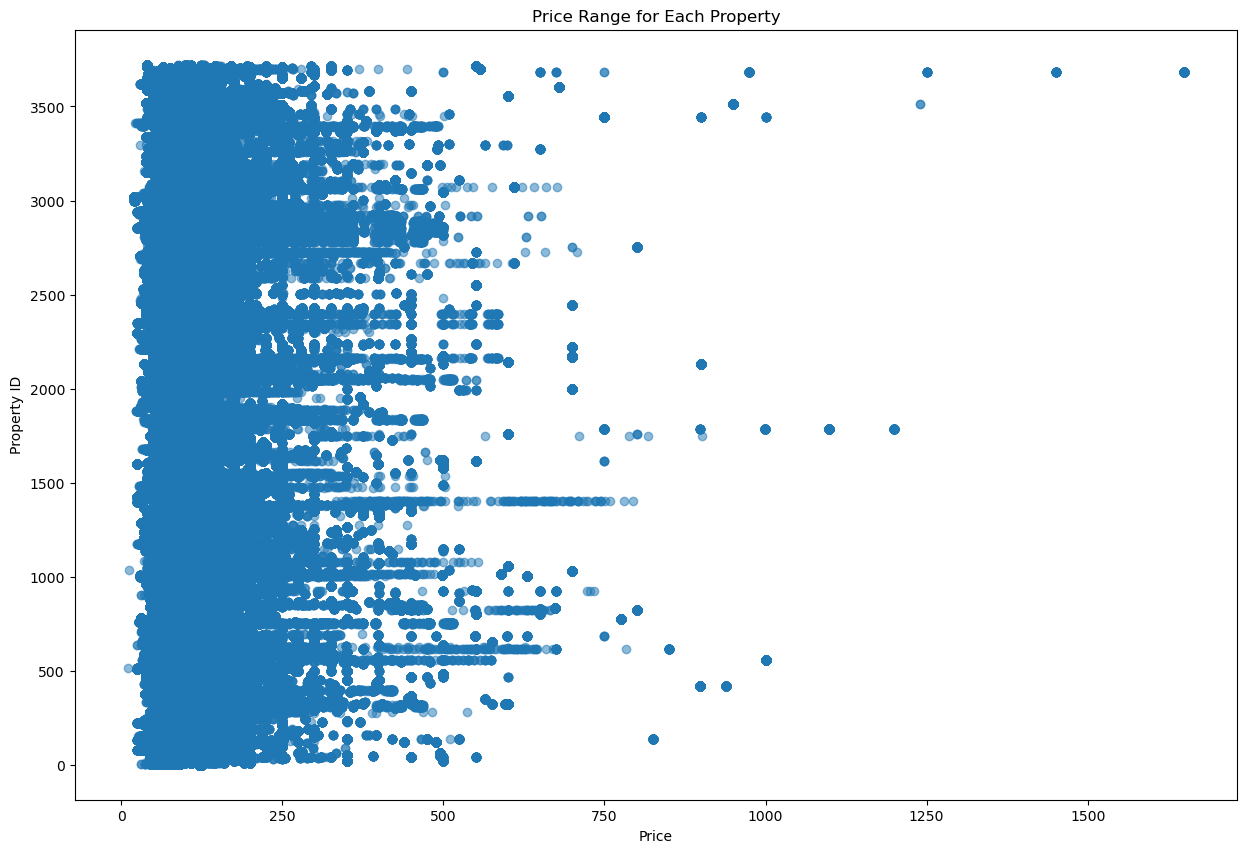

In [8]:
# Assigning a unique number to each property
cal_mod_df_copy['PropertyID'] = cal_mod_df_copy['Property'].astype('category').cat.codes

# Now plot
plt.figure(figsize=(15, 10))
plt.scatter(cal_mod_df_copy['price'], cal_mod_df_copy['PropertyID'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Property ID')
plt.title('Price Range for Each Property')

# Adjust y-axis to show intervals
plt.yticks(range(0, len(cal_mod_df_copy['Property'].unique()), 500), range(0, len(cal_mod_df_copy['Property'].unique()), 500))

plt.show()

# Inference 3: 

    The scatter plot proves that majority of the properties are with rents less than $500.  

    With more confidence, we can set the limit below $250.

    This establishes that, Airbnb always promotes more affordable homes than luxury flats and apartments.